In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import os
import re
from string import punctuation
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
spanish_stopwords = stopwords.words('spanish') # carga palabras stop del español

direccion_archivo_corpus = './nuestra-data/corpus.csv'

corpus = []
for line in open(direccion_archivo_corpus, 'r',encoding="utf-8"):
    corpus.append(line.strip()) #carga informacion sin espacios al principio ni al final de la linea

reviews_train = []
for line in open('./nuestra-data/entrenamiento.txt', 'r',encoding="utf-8"):
    reviews_train.append(line.strip()) #carga informacion sin espacios al principio ni al final de la linea
    
reviews_test = []
for line in open('./nuestra-data/prueba.txt', 'r',encoding="utf-8"):
    reviews_test.append(line.strip())

In [3]:
print("Cantidad de datos: " + str(len(corpus)))

Cantidad de datos: 1376


In [4]:
import csv
contador_positivos = 0
contador_negativos = 0
lista_positivos = []
lista_negativos = []
with open(direccion_archivo_corpus, 'r') as archivo_csv:
    csv_lector = csv.reader(archivo_csv, delimiter=',')
    for linea in csv_lector:
        if linea[1] == 'positive':
            contador_positivos += 1
            lista_positivos.append(linea)
        if linea[1] == 'negative':
            contador_negativos += 1
            lista_negativos.append(linea)
       
print("Clase Polaridad")
print("  Cantidad de positivos: " + str(contador_positivos))
print("  Cantidad de negativos: " + str(contador_negativos))

Clase Polaridad
  Cantidad de positivos: 808
  Cantidad de negativos: 568


In [5]:
import statistics

print("El promedio es: " 
      + str(statistics.mean(
          [contador_positivos, contador_negativos])))
print("La mediana es: " 
      + str(statistics.median(
          [contador_positivos, contador_negativos])))

dataframe_corpus = pd.read_csv("./nuestra-data/corpus_etiquetado_numerado.csv")
dataframe_corpus.describe()

El promedio es: 688
La mediana es: 688.0


,ID
count,1376.000000
mean,688.500000
std,397.361297
min,1.000000
25%,344.750000
50%,688.500000
75%,1032.250000
max,1376.000000


In [18]:
print("Tamaño de dataset de entrenamiento: " + str(len(reviews_train)))
print("Tamaño de dataset de prueba: " + str(len(reviews_test)))

Tamaño de dataset de entrenamiento: 800
Tamaño de dataset de prueba: 576


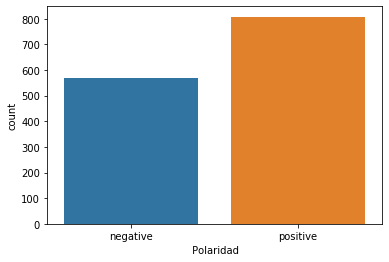

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=" Polaridad", data=dataframe_corpus);

In [7]:
reviews_train[:10]  # muestra ultimos 10 datos

['_vickydesimone pachiquintans -  Tome un milka oreo estoy asi😎. . jajajaj tkm!',
 'AgoosHughes decimelo a mi, me olvidé de comprarme algo en milka😣',
 'Ark_antos tonse cuando las pillas mis padres suelen pillar hacendado, o cosas así',
 'Benji_Mascolo bimbo felice❤️',
 'byBerted integrales???Pues hay pan integral pan tostado integral pan bimbo integral cereales integrales... Ale una clase rapida e intensiba',
 'camaleon92 Xabi, ambos sabemos que es lo que acabara ocurriendo, que me comeré una tableta de milka JAJAJAJAJA',
 'CandeArbizu McDonalds_Ar me muero ooo!!!!!!! Milka oreo soy tu fan😍😍😍😍',
 'ESAHE me recuerda al pan de pitaya... lo preparan en el norte... me tendre que conformar ahorita con unos de Bimbo :/',
 'FDoficial Pame viste el pan bimbo artesano bueno tambien esta para las hamburguesas... una bomba😁🍔🍔',
 'iComxkon_ yo más milka']

In [8]:
import re

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(reviews_train)
reviews_test_clean = preprocess_reviews(reviews_test)

In [9]:
reviews_train_clean[5]

'camaleon xabi ambos sabemos que es lo que acabara ocurriendo que me comeré una tableta de milka jajajajaja'

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer = 'word',
                stop_words = spanish_stopwords,
                binary=True)
cv.fit(reviews_train_clean)
X = cv.transform(reviews_train_clean)
X_test = cv.transform(reviews_test_clean)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

target = [1 if i < 400 else 0 for i in range(800)]

X_train, X_val, y_train, y_val = train_test_split(
    X, target, train_size = 0.75
)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))
    

Accuracy for C=0.01: 0.795
Accuracy for C=0.05: 0.78
Accuracy for C=0.25: 0.79
Accuracy for C=0.5: 0.79
Accuracy for C=1: 0.805


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
final_model = LogisticRegression(C=0.05)
final_model.fit(X, target)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), final_model.coef_[0]
    )
}
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:15]:
    print (best_positive)
    
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:15]:
    print (best_negative)

('milka', 1.1670617075278744)
('heineken', 0.8946119891425988)
('oreo', 0.37591801737918906)
('bimbo', 0.24853810962725445)
('bien', 0.24396620396853325)
('estrella', 0.2162160137501607)
('galicia', 0.21014534324710885)
('buena', 0.19132994202371678)
('estrellagalicia', 0.18457560710578227)
('quiero', 0.18406016603091563)
('gracias', 0.17738853571132504)
('chocolate', 0.17163506042621476)
('peugeot', 0.14920974395988287)
('siempre', 0.14350226254504786)
('pan', 0.13189320670978413)
('bankia', -0.8081224978011984)
('adidas', -0.7758579566739625)
('nike', -0.543305195399936)
('bbva', -0.370600416272117)
('banco', -0.3315968856060477)
('santander', -0.2986705881020187)
('arruinaunacitaconpalabras', -0.2222863329352624)
('cruzcampo', -0.19546885079522783)
('si', -0.16782507600645755)
('da', -0.15507485510209137)
('caixa', -0.15305901269154032)
('mierda', -0.1307837304216737)
('dinero', -0.12737401747481364)
('asco', -0.11955716621524876)
('sabadell', -0.10898930777365168)


In [25]:
from sklearn.metrics import confusion_matrix
predictions = final_model.predict(X_train)
print(confusion_matrix(y_train, predictions))

[[263  34]
 [ 42 261]]
